# Logistic regression

Libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/) 
- Modelling and scoring:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from utils import evaluate_classification_metrics

Here I import the `creditcard.csv` dataset, obtained from [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). The dataset contains 284,807 transactions, of which 492 are fraudulent. The goal is to predict whether a transaction is fraudulent or not based on the features provided.
I remove the `Time` column, as it is not relevant for the model. I also remove the `Class` column from the features, as it is the target variable. I then split the data into training and testing sets, with 80% of the data used for training and 20% for testing.

In [2]:
df = pd.read_csv("creditcard.csv", sep = ",")

X = df.iloc[:, 1:-1].values
# Get the last column as the target
y = df.iloc[:, -1].values

# Convert the pandas dataframes into np.arrays so that we can use all the previous codes we defined
X = np.array(X)
y = np.array(y)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the random forest model

Now, it comes the turn to train the random forest.

In [4]:
rf = RandomForestClassifier(random_state=42) # class_weight="balanced", 
rf.fit(X_train, y_train)

evaluate_classification_metrics(y_test, rf.predict(X_test), 1)

{'Confusion Matrix': [np.int64(56862),
  np.int64(2),
  np.int64(23),
  np.int64(75)],
 'Accuracy': np.float64(0.9995611109160493),
 'Precision': np.float64(0.974025974025974),
 'Recall': np.float64(0.7653061224489796),
 'Specificity': np.float64(0.9999648283624085),
 'F1 Score': np.float64(0.8571428571428571)}

Ready predictions


C:\Users\EMINE\AppData\Local\Temp\ipykernel_23004\3841804746.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + listclasses, rotation=90)
C:\Users\EMINE\AppData\Local\Temp\ipykernel_23004\3841804746.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + listclasses)


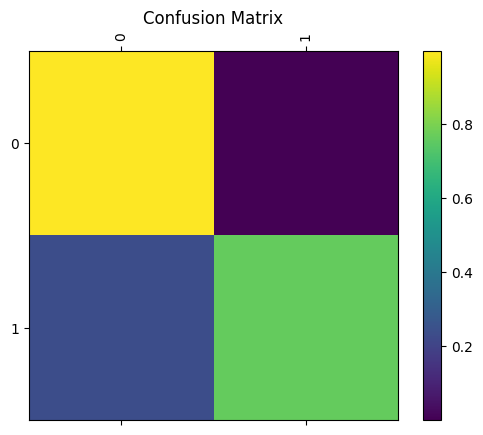

[[9.99964828e-01 3.51716376e-05]
 [2.34693878e-01 7.65306122e-01]]


In [5]:
# CONFUSION MATRIX
listclasses = ['0', '1']
numclasses = 2

confusion = np.zeros((numclasses, numclasses))
predictions = rf.predict(X_test)
print("Ready predictions")
for i in range(len(y_test)):
    confusion[int(y_test[i]), int(predictions[i])] += 1

# Normalize by dividing every row by its sum
for i in range(numclasses):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion, cmap='viridis')
plt.title('Confusion Matrix')
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + listclasses, rotation=90)
ax.set_yticklabels([''] + listclasses)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()
print (confusion)